Number of columns: 5
Number of passengers: 500


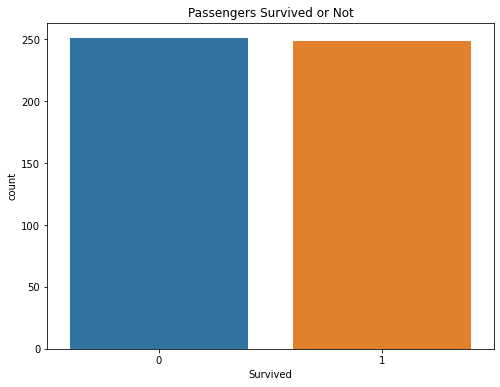

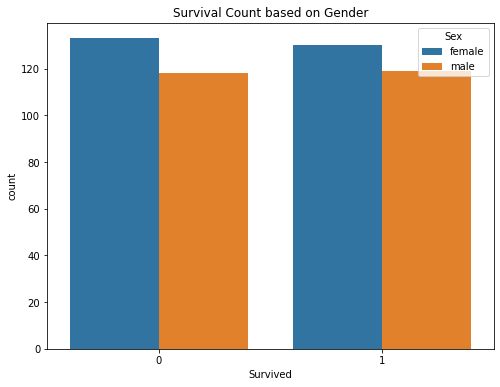

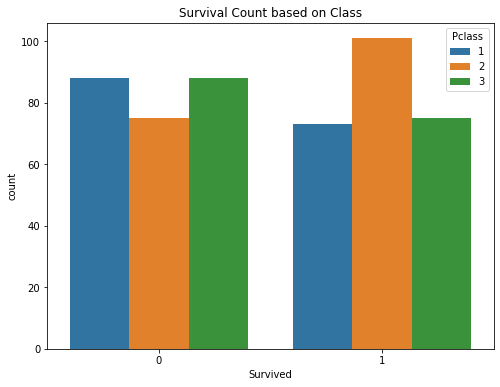

Age of a passenger who survived: 32


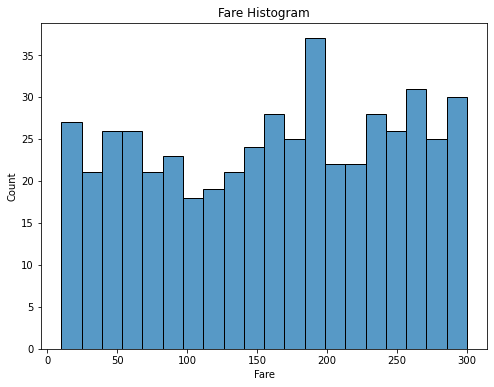

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       500 non-null    object 
 1   Age       500 non-null    int64  
 2   Pclass    500 non-null    int64  
 3   Fare      500 non-null    float64
 4   Survived  500 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 19.7+ KB
None
Does the dataset have null data: False
Null counts:
 Sex         0
Age         0
Pclass      0
Fare        0
Survived    0
dtype: int64


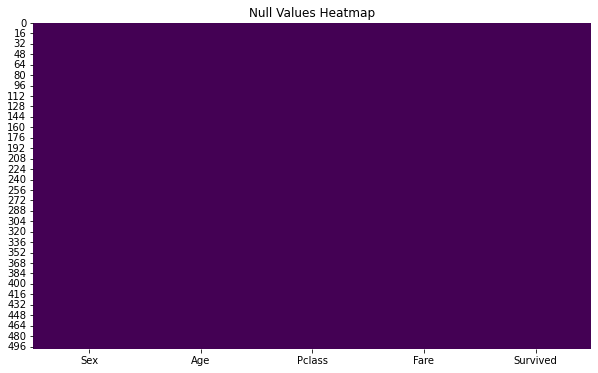

Confusion Matrix:
 [[22 26]
 [26 26]]
Accuracy Score: 0.48


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import tkinter as tk
from tkinter import messagebox

# Read the dataset
data = pd.read_csv('titanic_dataset.csv')  # Replace with the actual file path

# Find the number of columns in the dataset
num_columns = len(data.columns)
print("Number of columns:", num_columns)

# Find the number of passengers in the dataset
num_passengers = len(data)
print("Number of passengers:", num_passengers)

# Draw the count plot of passengers survived or not
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Survived')
plt.title('Passengers Survived or Not')
plt.show()

# Draw the count plot of male and female survived and not survived
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Survived', hue='Sex')
plt.title('Survival Count based on Gender')
plt.show()

# Draw the count plot of survived or not survived based on class
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Survived', hue='Pclass')
plt.title('Survival Count based on Class')
plt.show()

# Find the age of a passenger who survived
age_of_survivor = data[data['Survived'] == 1]['Age'].dropna()
print("Age of a passenger who survived:", age_of_survivor.values[0])

# Draw the histogram of fare plot
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Fare', bins=20)
plt.title('Fare Histogram')
plt.show()

# Find the complete info of the dataset
data_info = data.info()
print(data_info)

# Check for null data in the dataset
has_null = data.isnull().any().any()
print("Does the dataset have null data:", has_null)

# Count the null values in the dataset
null_counts = data.isnull().sum()
print("Null counts:\n", null_counts)

# Draw the heatmap of null values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Null Values Heatmap')
plt.show()

# Remove the null values from the dataset
data_cleaned = data.dropna()
# Create dummy variables if applicable
data_cleaned = pd.get_dummies(data_cleaned, columns=['Sex'], drop_first=True)


# Splitting the data for model training
X = data_cleaned.drop('Survived', axis=1)
y = data_cleaned['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

# GUI for displaying results
def show_results():
    result_text = f"Confusion Matrix:\n{conf_matrix}\n\nAccuracy Score: {accuracy:.2f}"
    messagebox.showinfo("Model Results", result_text)

root = tk.Tk()
root.title("Titanic Survival Prediction")
result_button = tk.Button(root, text="Show Results", command=show_results)
result_button.pack(padx=20, pady=10)
root.mainloop()
